In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import plotnine as p9
from plotnine import*
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
# scikitlearn 
from sklearn import linear_model, metrics, model_selection, preprocessing, tree
from sklearn.datasets import fetch_mldata
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import label_binarize, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import statsmodels.formula.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
data = pd.read_csv('~/Desktop/Datasets/youtube-new 2/USvideos.csv')
data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [4]:
data_al = data[data["category_id"]== 15  ]

In [5]:
data_al.describe().round()

,category_id,views,likes,dislikes,comment_count
count,920.0,920.0,920.0,920.0,920.0
mean,15.0,831143.0,21055.0,573.0,2892.0
std,0.0,1102091.0,25425.0,779.0,4842.0
min,15.0,3393.0,6.0,0.0,0.0
25%,15.0,185072.0,5433.0,108.0,459.0
50%,15.0,444502.0,14432.0,276.0,1173.0
75%,15.0,941299.0,26694.0,677.0,3270.0
max,15.0,6187457.0,178243.0,4899.0,44063.0


##comment:
Most of the views based on the Animal is ranging from 3393.0 to 6187457
Most of the likes based on the Animal is ranging from 6 to 178243.0
Most of the dislikes based on the Animal is ranging from 0 to 4899.0
Most of the comments based on the Animal is ranging from 0 to 44063
=> we can see people give likes to Animal related  videos a lot 

In [6]:
print('We have {} rows of data with {} columns '.format(*data_al.shape))

We have 920 rows of data with 16 columns 


In [7]:
#create new col year based Date
from datetime import datetime
data_al['trending_date']= data_al['trending_date'].map(lambda x: datetime.strptime(x,'%y.%d.%m'))
data_al['year']=data_al['trending_date'].apply(lambda x: x.year)
data_al['month']=data_al['trending_date'].apply(lambda x: x.month)
data_al['day']=data_al['trending_date'].apply(lambda x: x.day)

In [8]:
data_new = data_al

## Data Types and Missing Values
The dataframe.info method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values.

In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(data_new)

Your selected dataframe has 19 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
description,4,0.4


## Comment:
Only description col missing 4 => Because the descripton of the video is sospecific about the video so I will drop it as it wont be affects the model

In [11]:
data_new.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,year,month,day
14,TaTleo4cOs8,2017-11-14,SHOPPING FOR NEW FISH!!!,The king of DIY,15,2017-11-12T18:30:01.000Z,"shopping for new fish|""new fish""|""aquarium fis...",207532,7473,246,2120,https://i.ytimg.com/vi/TaTleo4cOs8/default.jpg,False,False,False,Today we go shopping for new fish for some of ...,2017,11,14
92,-OK9i1_YYYc,2017-11-14,Animal Adventure Park Giraffe Cam,Animal Adventure Park,15,2017-11-12T00:18:43.000Z,"Giraffe|""Zoo""|""New York""|""giraffe cam""|""Animal...",45455,2282,35,17,https://i.ytimg.com/vi/-OK9i1_YYYc/default.jpg,False,False,False,November 2017 Giraffe Cam Hours\n\nEnjoy your ...,2017,11,14
97,xfmipNU4Odc,2017-11-14,Edna's registered owner thought she was dead f...,Hope For Paws - Official Rescue Channel,15,2017-11-10T18:02:04.000Z,[none],284666,16396,81,949,https://i.ytimg.com/vi/xfmipNU4Odc/default.jpg,False,False,False,Please donate $5 and help us save more lives:\...,2017,11,14
128,qEEtzzi1EII,2017-11-14,Birthdays - Simon's Cat | GUIDE TO,Simon's Cat,15,2017-11-09T13:34:58.000Z,"cartoon|""simons cat""|""simon's cat""|""simonscat""...",426078,19323,245,945,https://i.ytimg.com/vi/qEEtzzi1EII/default.jpg,False,False,False,Watch Simon's Cat's Guide To Birthdays! \nSUBS...,2017,11,14
167,YHDbsyyjld0,2017-11-14,A Tropical Island with 500 CATS!,Kitten Lady,15,2017-11-09T23:44:18.000Z,"lanai|""sanctuary""|""feral""|""hawaii""|""hawaiian""|...",46571,4250,16,408,https://i.ytimg.com/vi/YHDbsyyjld0/default.jpg,False,False,False,Lanai Cat Sanctuary in Hawaii is cat paradise!...,2017,11,14


In [12]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

## Exploratory Data Analysis

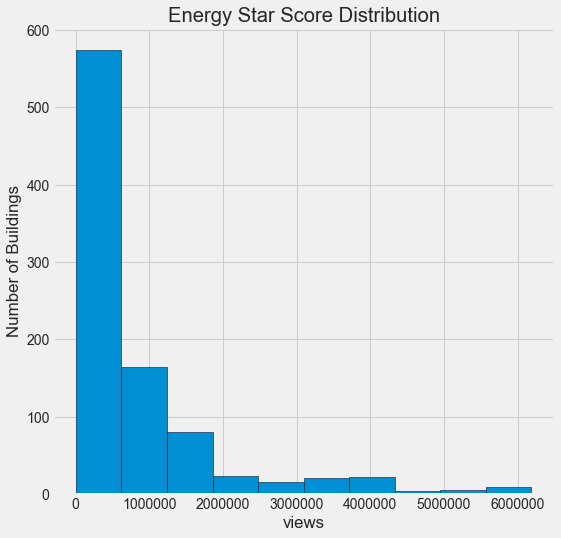

In [13]:
from IPython.core.pylabtools import figsize
figsize(8, 8)
# Rename the score 
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data_new['views'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('views'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

=>  we can tell that the most people view animal related videos are mostly 0- 1000000, then there are not many videos have more than 1 mil views 

Text(0.5, 1.0, 'Bar plot of the view of likes ')

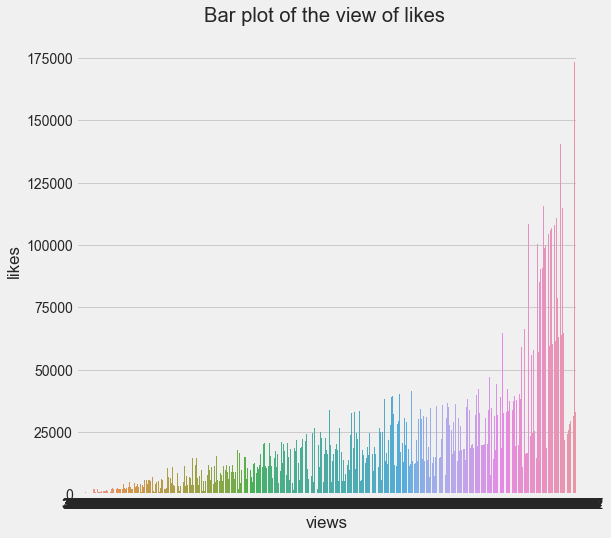

In [14]:
sns.barplot(x='views', y='likes',  data=data_new)
plt.xlabel('views')
plt.ylabel('likes')
plt.title('Bar plot of the view of likes ')

=> we can tell the videos has more views, it has more likes 

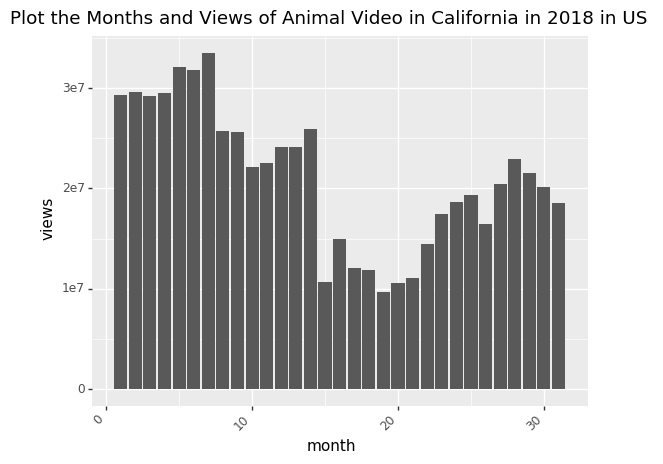

<ggplot: (7546913158)>

In [15]:
data_2018 = data_new[data_new['year']== 2018]
ggplot(data_2018, aes(x='day', y='views'))+\
theme(axis_text_x = element_text(angle=45, hjust=1))+ geom_bar(stat="identity")  + \
xlab("month") + ylab("views") + ggtitle("Plot the Months and Views of Animal Video in California in 2018 in US ")


=> Based on the bar we can tell during 2018  that January , May and June has more views than other months.

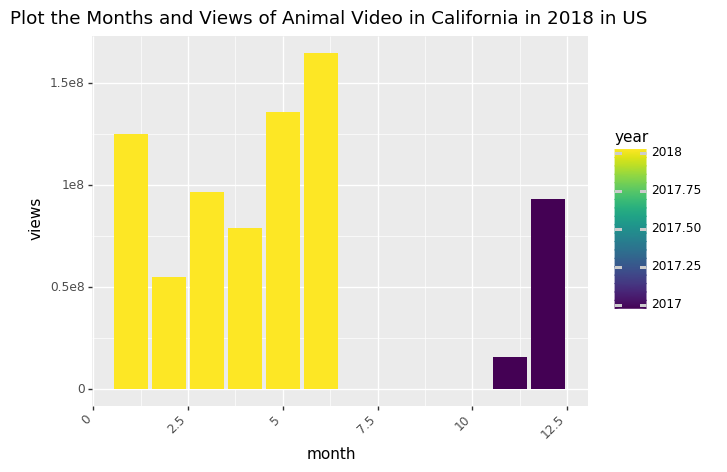

<ggplot: (7546885615)>

In [16]:

ggplot(data_new, aes(x='month', y='views', fill = 'year'))+\
theme(axis_text_x = element_text(angle=45, hjust=1))+ geom_bar(stat="identity")  + \
xlab("month") + ylab("views") + ggtitle("Plot the Months and Views of Animal Video in California in 2018 in US ")


=> we can tell the 2018 , there are basiclly more views compared to 2017

Extract only June, it looks like the views going up everyday but not too much, especially the firsday there are already 1mil views. 

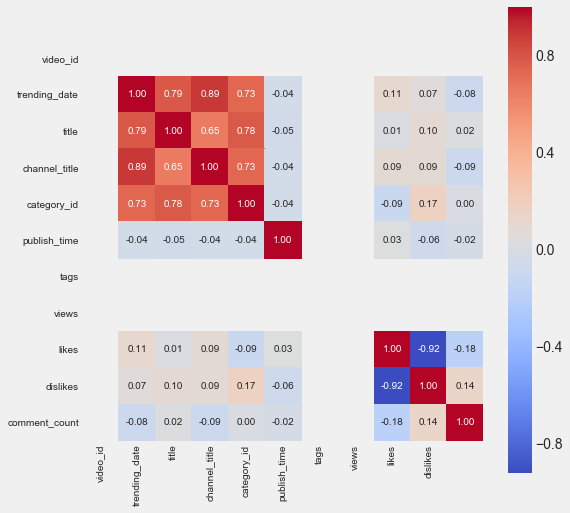

In [17]:
## plot coreation 
corr = data_new.corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 10}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = data, size = 10)
g.set_yticklabels(rotation=0, labels = data, size = 10)
g.set_xticks(np.arange(.5,10.5,1))
plt.rcParams["figure.figsize"] = (20,20)

=> We can tell that most of the var trending day, video-id, title, channel title are mostly corelatted

## Feature Engineering  and selection

In [18]:
def remove_corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        x = x.drop(col, axis=1)
    return x

In [19]:
data_new = remove_corr_df(data_new, 0.6)
data_new  = data_new.dropna(axis=1, how = 'all')
print(data_new.shape)

(920, 17)


##  Split Into Training and Testing Sets

In [27]:
data_final.head()

,trending_date,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,year,month,day
14,2017-11-14,207532,7473,246,2120,https://i.ytimg.com/vi/TaTleo4cOs8/default.jpg,False,False,False,Today we go shopping for new fish for some of ...,2017,11,14
92,2017-11-14,45455,2282,35,17,https://i.ytimg.com/vi/-OK9i1_YYYc/default.jpg,False,False,False,November 2017 Giraffe Cam Hours\n\nEnjoy your ...,2017,11,14
97,2017-11-14,284666,16396,81,949,https://i.ytimg.com/vi/xfmipNU4Odc/default.jpg,False,False,False,Please donate $5 and help us save more lives:\...,2017,11,14
128,2017-11-14,426078,19323,245,945,https://i.ytimg.com/vi/qEEtzzi1EII/default.jpg,False,False,False,Watch Simon's Cat's Guide To Birthdays! \nSUBS...,2017,11,14
167,2017-11-14,46571,4250,16,408,https://i.ytimg.com/vi/YHDbsyyjld0/default.jpg,False,False,False,Lanai Cat Sanctuary in Hawaii is cat paradise!...,2017,11,14


In [35]:

missing_columns = ['video_id','title', 'publish_time', 'tags','trending_date','thumbnail_link','description' ]
data_final = data_new.drop(columns = list(missing_columns))
# Separate out the features and targets
features = data_final.drop(columns='views')
targets = pd.DataFrame(data_final['views'])

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(644, 9)
(276, 9)
(644, 1)
(276, 1)


In [36]:

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))
print('The naive estimate is off by about 25 points on the test set. The score ranges from 1–100,so this represents an error of 25%, quite a low bar to surpass!')

The baseline guess is a score of 444501.50
Baseline Performance on the test set: MAE = 682948.3804
The naive estimate is off by about 25 points on the test set. The score ranges from 1–100,so this represents an error of 25%, quite a low bar to surpass!


## Evaluating and Comparing Machine Learning Models

In [37]:
data_new.columns

Index(['video_id', 'trending_date', 'title', 'publish_time', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'year', 'month', 'day'],
      dtype='object')

## Scaling Features

In [38]:
from sklearn.preprocessing import StandardScaler
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)
# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

## Models to Evaluate
We will compare five different machine learning models using the great Scikit-Learn library:

Linear Regression
Support Vector Machine Regression
Random Forest Regression
Gradient Boosting Regression
K-Nearest Neighbors Regression

In [39]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [40]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 264050.5640


In [43]:
from sklearn.svm import SVR
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)


Support Vector Machine Regression Performance on the test set: MAE = 681145.7338


In [45]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 118891.9580


In [46]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 156424.9449


In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 247167.6572


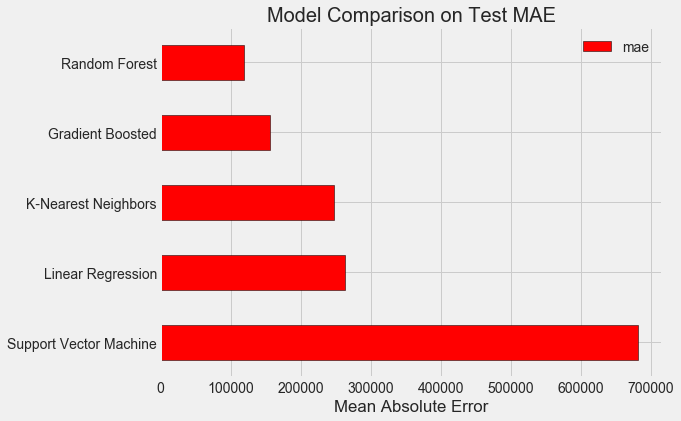

In [49]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

=>  Random forest regressor performs the best followed by the random forest .From here, I am going to concentrate on optimizing the best model using hyperparamter tuning. Given the results here, I will concentrate on using the Random forest regressor.

## Model Optimization
In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem.

### Hyperparameters with k-fold cross validation = 3

In [58]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [59]:
grid_search.fit(X, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 387 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   57.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [62]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [73]:
#### Evaluate func to make predict
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
### evaluate the default model
print("Evaluate the default model \n")
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X, y)
base_accuracy = evaluate(base_model, X_test, y_test)
### evaluate the best random search model
print("\nEvaluate the best random search model ")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X, y)
random_accuracy


Evaluate the default model 

Model Performance
Average Error: 114351.7170 degrees.
Accuracy = 69.86%.

Evaluate the best random search model 
Model Performance
Average Error: 37125.8181 degrees.
Accuracy = 91.28%.


91.27900920296389